# 연구 기록 일지!

> 깃허브를 7월부터 시작해서 이전 일지는 없습니다...

>이제부터 꾸준히 작성!!

**이곳은 연구기록만 작성할 것 이기에, 코드나 이미지는 기록 하지 않을것 입니다!. 그리고 코드파일과 이미지폴더를 따로 만들어 관리할 것입니다!**

# 이전 연구 기록 요약

1. 공구의 마모를 좀더 자세히 표현하기 위한 이미지 프로세싱공부 -> openCV


2. 모델링 초기에는 해당 이미지가 마모인지 아닌지만을 판단하는 객체탐지모델만을 고려.

3. 하지만 이런건 너무 흔해서 객체탐지 말고 Segmentation쪽으로 방향 전환

4. 처음에는 u-net을 이용해 공구에서 마모된 부분만을 세그멘테이션 함.

5. 하지만 라벨링을 기능을 추가하고 싶어서 M-RCNN으로 모델변경

6. 그러나 M-RCNN과 Tensorflow의 버전충돌이 너무 심해서 모델변경 고려.

7. 이후 Yolo에도 Segmentation을 제공한다는 것을 알게 된후 yoloV8 Seg모델을 사용하였고, 성공적으로 마모된 부분만을 세그멘테이션 하였다!. -> 현재까지 진행상황

# `-`  기록일지

`7월 13일 목`


* 절삭품의 마모를 확인.
> 마모된 공구로 작업을 수행한 절삭품과 정상인 공구로 작업을 수행한 절삭품과의 차이를 비교하기 위해


`-` 실패.. 

이유는 실험 과정에서 뭐가 정상인 공구로 만든 절삭품인지 아니면 마모된 공구로 만든 절삭품인지 라벨링 해놓지 않음, 또한 이 실험한 학생은 연락이 잘안됨..

`7월 14일 금 `

* 포기하지 않고 절삭품을 하나하나 비교해 가면서 마모를 확인해보자!

`-` **성공!!**

> 수많은 절삭품중 한눈에 봐도 표면이 거친것과 매끈한것이 있길래 현미경으로 표면을 관찰한 결과.  두표면에서 분명한 차이가 있다!.

`7월 19일 수` 

* 마모이미지와 정상이미지의 명확한 차이가 필요하다 -> 이미지 세분화

1. Edge detection `완`

2. U-net -> 개념은 알고 실습만. https://www.youtube.com/watch?v=sSxdQq9CCx0

3. pix2pix: https://www.youtube.com/watch?v=BzObmqSexEA&t=652s

4. Segmentation anything: https://www.youtube.com/results?search_query=segmentation+anything

5. DexiNed
: https://www.youtube.com/watch?v=Hz0uU04B3U8
:https://www.kaggle.com/code/venkatkumar001/dexined-edge-detection-part-ii
-> 이것보다는 hed..?

`7월 20일 목`

* cuda가 또 말썽이다.. gpu가 잡히지 않는다
* cuda 잡혔는데 이젠 TORCH_USE_CUDA_DSA` to enable device-side assertions 이런 에러가 발생한다...

`-` 해결완료..하루 다 잡아 먹었다..

1. 처음에는 쿠다의 버전을 12.1로 올려줄려고함 왜냐하면 그래픽 권장이 12.1이기에.

2. 처음에는 torch에서 사용하는 쿠다 버전만을 업그레이드 함

* 그런데 fastai는 최신 토치버전을 지원하지 않음, 그래서 패키지 충돌 발생..

* 그런데 이과정에서 또 내가 몰랐던 점이 토치의 쿠다와 gpu드라이버의 쿠다가 서로 다른거 였음.. 난 하나로 통일 되는줄.. 

* 이걸 몰랐던 나.. 처음에 gpu잡힌다고 좋아하다가 모델학습 과정에서 gpu가 100%되면서 주피터 꺼지는거 보고 뭔가 이상하다고 파악..


* 그래서 토치 다 삭제하고 현재 그래픽 드라이버에 맞는걸로 설치( cuda 11.8) -> 해결완료



`+`  **pip에 대하여**

* 주피터 내에서 pip 를 통해 uninstall 하는 과정이 너무 오래걸림
> 그래서 anaconda cmd를 통해 삭제하는 법으로 바꿈! -> 속도가 비교도 안된다.


1. 내가 사용하고 있는 가상환경 접속.

* conda activate 가상환경이름

2. 내가 원하는 패키지 삭제

* pip uninstall 패키지


`-` 아래는 패키지 뒤져보다가 이런것도 있구나 해서 적어둠

In [3]:
from wasabi import Printer

msg = Printer()

msg.info("This is an information message")
msg.warn("This is a warning message")
msg.fail("This is a failure message")
msg.good("This is a success message")
msg.text("This is a plain text message")

#오..

ℹ This is an information message
⚠ This is a warning message
✘ This is a failure message
✔ This is a success message
This is a plain text message


`7월 24일`


dexiNed 학습

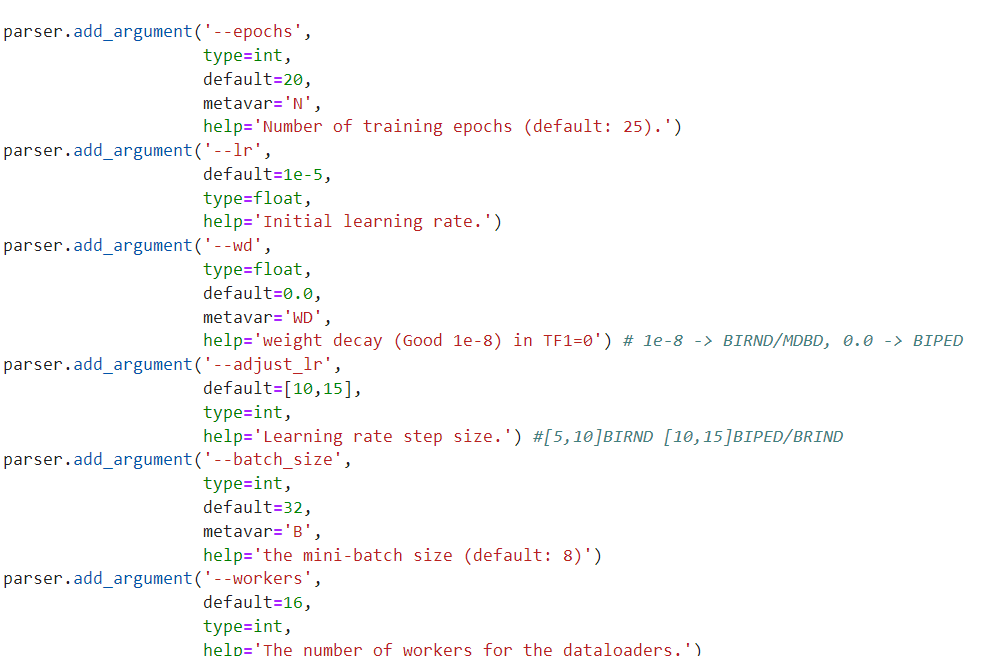

1. 배치 =4

2. 배치 = 8

3. 배치 = 32

* 배치는 이미지의 차이가 없음

4. 횟수 20 ->30

5. 횟수 20 ->40

* 횟수도 차이 없음 ->횟수는 고정으로 25

6. wd 0.0 ->1e-8

7. wd 0.0 ->1e-11

8. ep = 20, lr = 1e-10 lr step- 5,10


-------흑백------

---컬러---

9. ep = 20, lr = 1e-10 lr step- 5,10

컬러는 구리다..


------흑백------

10.  위와 동일. wd =0.1, kr=2e-0.1

11. 10.  위와 동일. wd =0.1, lr=le-8, wd = 0.

-> 계속 같음..


발표용 이미지 


* nor(1)
* wear(15)
* wear(24)

* 흑백이미지 했을때 결과들

robert:x

sobel: 잘나옴
